<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/top2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
my_path="/content/drive/MyDrive/CS491/Data/US_Inaugural_Addresses"

In [6]:
import os
documents = []

for file in os.listdir(my_path):
    if file.endswith(".txt"):
        file_path = os.path.join(my_path, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            documents.append(content)  # Add the raw content to the documents list


In [7]:
!pip install Top2Vec -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 25.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.2 MB/s eta 0:00:00


In [8]:
from top2vec import Top2Vec

# Assuming 'documents' is a list of text documents you wish to model
model = Top2Vec(documents, embedding_model='doc2vec', workers=2)
# model = Top2Vec(documents, embedding_model='universal-sentence-encoder', workers=2, use_embedding_model_tokenizer=True)


# Now you can use the model to find topics, get topic sizes, etc.
topics = model.get_topics()


2024-03-17 13:12:51,340 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-17 13:12:52,085 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-17 13:12:59,032 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-17 13:13:09,080 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-17 13:13:09,090 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [9]:
topics

(array([['foreign', 'rights', 'present', 'administration', 'influence',
         'however', 'may', 'duties', 'interest', 'powers', 'countrymen',
         'which', 'duty', 'interests', 'general', 'civil', 'necessary',
         'subject', 'support', 'state', 'principle', 'any', 'important',
         'executive', 'governments', 'being', 'should', 'domestic',
         'public', 'states', 'policy', 'proper', 'part', 'constitutional',
         'congress', 'best', 'might', 'political', 'confidence', 'course',
         'the', 'by', 'constitution', 'some', 'since', 'ought', 'could',
         'within', 'citizens', 'such'],
        ['know', 'strong', 'life', 'live', 'today', 'america', 'together',
         'opportunity', 'old', 'because', 'we', 'future', 'lives', 'way',
         'god', 'work', 'come', 'ourselves', 'need', 'help', 'things',
         'children', 'strength', 'better', 'new', 'nation', 'through',
         'americans', 'before', 'day', 'believe', 'democracy', 'do',
         'where', '

In [10]:
len(topics)

3

In [11]:
topics[0][0]

array(['foreign', 'rights', 'present', 'administration', 'influence',
       'however', 'may', 'duties', 'interest', 'powers', 'countrymen',
       'which', 'duty', 'interests', 'general', 'civil', 'necessary',
       'subject', 'support', 'state', 'principle', 'any', 'important',
       'executive', 'governments', 'being', 'should', 'domestic',
       'public', 'states', 'policy', 'proper', 'part', 'constitutional',
       'congress', 'best', 'might', 'political', 'confidence', 'course',
       'the', 'by', 'constitution', 'some', 'since', 'ought', 'could',
       'within', 'citizens', 'such'], dtype='<U14')

In [12]:
topics[0][1]

array(['know', 'strong', 'life', 'live', 'today', 'america', 'together',
       'opportunity', 'old', 'because', 'we', 'future', 'lives', 'way',
       'god', 'work', 'come', 'ourselves', 'need', 'help', 'things',
       'children', 'strength', 'better', 'new', 'nation', 'through',
       'americans', 'before', 'day', 'believe', 'democracy', 'do',
       'where', 'hope', 'again', 'what', 'here', 'us', 'history', 'men',
       'like', 'see', 'let', 'earth', 'freedom', 'world', 'done', 'stand',
       'another'], dtype='<U14')

In [13]:
# Assuming 'model' is your trained Top2Vec model and 'keywords' is a list of keywords.
keywords = ["war", "liberty"]
documents, document_score, document_ids = model.search_documents_by_keywords(keywords=keywords, num_docs=10)

# This will return the top 10 most similar documents to the provided keywords,
# their similarity scores, and their IDs within the model.


In [14]:
# Print the results
for i in range(len(documents)):
    print(f"Document ID: {document_ids[i]}")
    print(f"Similarity Score: {document_score[i]}")
    print(f"Document Content: {documents[i][:20]}...")  # Print the first 200 characters to get an idea of the document content
    print("---")

Document ID: 45
Similarity Score: 0.7773751020431519
Document Content: Abraham Lincoln	1865...
---
Document ID: 40
Similarity Score: 0.7054733633995056
Document Content: George Washington	17...
---
Document ID: 11
Similarity Score: 0.654454231262207
Document Content: James A. Garfield	18...
---
Document ID: 28
Similarity Score: 0.6405376195907593
Document Content: James Madison	1813-0...
---
Document ID: 56
Similarity Score: 0.6266799569129944
Document Content: Franklin D. Roosevel...
---
Document ID: 6
Similarity Score: 0.6258646845817566
Document Content: Andrew Jackson	1833-...
---
Document ID: 9
Similarity Score: 0.6185228824615479
Document Content: William McKinley	3/4...
---
Document ID: 32
Similarity Score: 0.61479651927948
Document Content: Theodore Roosevelt	3...
---
Document ID: 22
Similarity Score: 0.6112414002418518
Document Content: John Adams	1797-03-0...
---
Document ID: 4
Similarity Score: 0.5786358714103699
Document Content: James Buchanan	1857-...
---


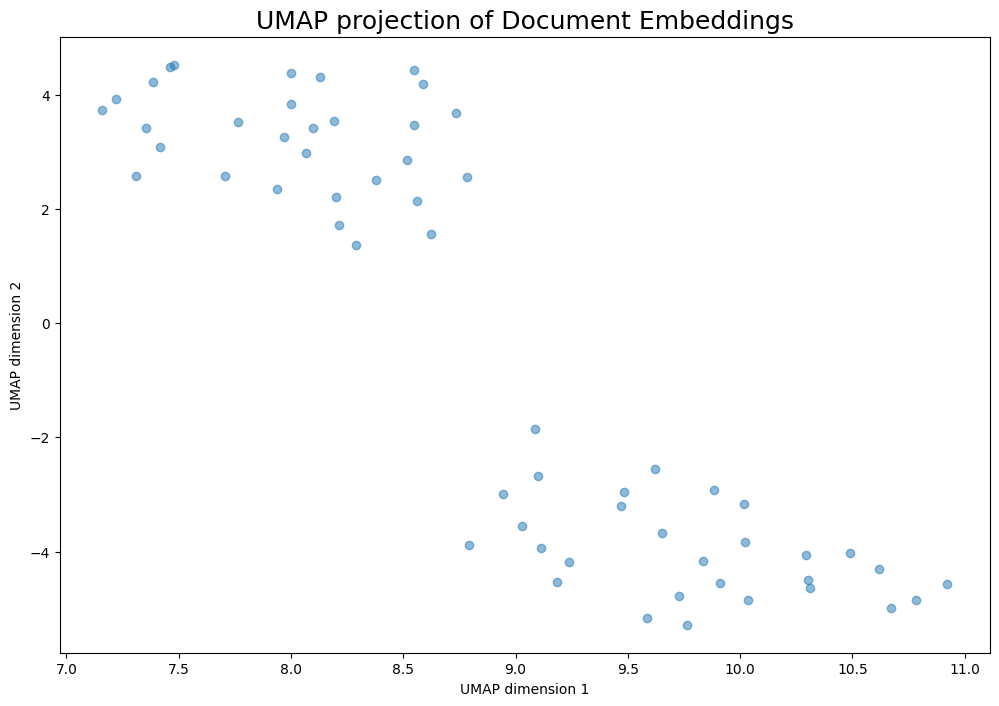

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap  # UMAP for dimensionality reduction

# Assuming 'model' is your trained Top2Vec model

# Retrieve document embeddings from the Top2Vec model
document_embeddings = model.document_vectors

# Reduce the dimensionality of embeddings to 2D for visualization
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(document_embeddings)

# Plot the UMAP embeddings
plt.figure(figsize=(12, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], alpha=0.5)
plt.title('UMAP projection of Document Embeddings', fontsize=18)
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.show()
